#  Wipro Intraday Price from 2010

In [105]:
#data cleaning is done by pandas library

#The key areas to inspect for data cleanliness are:

# Missing Values
# Duplicate Data
# Data Types
# Outliers
# Consistent Data Formatting
# Range and Validity of Data
# Categorical Consistency

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime    # To handle time series data and date formatting

# Data Cleaning

In [107]:
# first step is we need to load all the important libs,
# and after that we have to upload the dataset 

df = pd.read_csv('WIPRO.NS.csv')

df.head()   ## Display the first few rows of the dataset to get a quick overview

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-29,184.125046,184.537552,182.268799,183.187546,161.845139,1726631.0
1,2010-12-30,183.750046,185.625046,182.043793,183.731293,162.325516,7312424.0
2,2010-12-31,183.018799,185.118790,182.250046,184.218796,162.756241,2111052.0
3,2011-01-03,186.300049,186.300049,180.862549,181.143799,160.039536,2610626.0
4,2011-01-04,181.537552,183.712540,181.162552,181.743790,160.569565,3878988.0


In [108]:
df.info()   # Displaying general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3212 non-null   object 
 1   Open       3206 non-null   float64
 2   High       3206 non-null   float64
 3   Low        3206 non-null   float64
 4   Close      3206 non-null   float64
 5   Adj Close  3206 non-null   float64
 6   Volume     3206 non-null   float64
dtypes: float64(6), object(1)
memory usage: 175.8+ KB


In [109]:
df['Date'] = pd.to_datetime(df['Date'])

In [110]:
df.describe()     # Getting statistical summary

,Date,Open,High,Low,Close,Adj Close,Volume
count,3212,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3.206000e+03
mean,2017-06-28 00:42:35.417185536,266.472593,269.399096,263.275263,266.269624,258.514452,5.745199e+06
min,2010-12-29 00:00:00,119.100029,122.981277,116.437531,119.906281,107.438148,0.000000e+00
25%,2014-03-23 12:00:00,180.871922,182.610981,178.795357,180.612538,173.561642,2.915078e+06
50%,2017-06-29 12:00:00,214.481301,216.675049,212.062546,214.331299,205.930870,4.261680e+06
75%,2020-09-30 06:00:00,316.274994,332.599991,314.462509,326.662491,321.920441,6.393488e+06
max,2023-12-28 00:00:00,722.750000,739.849976,716.000000,721.500000,712.624756,1.303676e+08
std,NaN,131.241317,132.422322,129.677857,130.914416,133.430383,6.335780e+06


In [111]:
# Check for missing values (NaN values) in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column are:")
print(missing_values)

Missing values in each column are:
Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64


In [112]:
df = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Now fill missing values with the mean (since there are no non-numeric columns)
df.fillna(df.mean(), inplace=True)


# Drop rows with missing values (if any exist after filling with mean)
df.dropna(inplace=True)

print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [113]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,184.125046,184.537552,182.268799,183.187546,161.845139,1726631.0
1,183.750046,185.625046,182.043793,183.731293,162.325516,7312424.0
2,183.018799,185.118790,182.250046,184.218796,162.756241,2111052.0
3,186.300049,186.300049,180.862549,181.143799,160.039536,2610626.0
4,181.537552,183.712540,181.162552,181.743790,160.569565,3878988.0


In [114]:
#now we have to check for duplicate data

duplicates=df.duplicated().sum()
print("total number of duplicate values are:")
print(duplicates)

total number of duplicate values are:
5


In [115]:
no_duplicates=df.drop_duplicates(inplace=True)

print(no_duplicates)

In [116]:
df.duplicated().sum()

0

In [117]:
print(df['Open'].dtypes)   #to check a particular data type of any column

float64


In [118]:
print(df.dtypes)   #to check whole data type of each column in the dataset

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [119]:
df.to_csv('WIPROCleaned.NS.csv', index=False)

In [120]:
#Check correlation between numerical columns
print(df.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999710  0.999740  0.999477   0.998953  0.240098
High       0.999710  1.000000  0.999668  0.999791   0.999176  0.250874
Low        0.999740  0.999668  1.000000  0.999758   0.999264  0.236804
Close      0.999477  0.999791  0.999758  1.000000   0.999443  0.245719
Adj Close  0.998953  0.999176  0.999264  0.999443   1.000000  0.245966
Volume     0.240098  0.250874  0.236804  0.245719   0.245966  1.000000


# Data Visualizations and Analysis

In [121]:
# Set style for better visuals
sns.set_style("whitegrid")

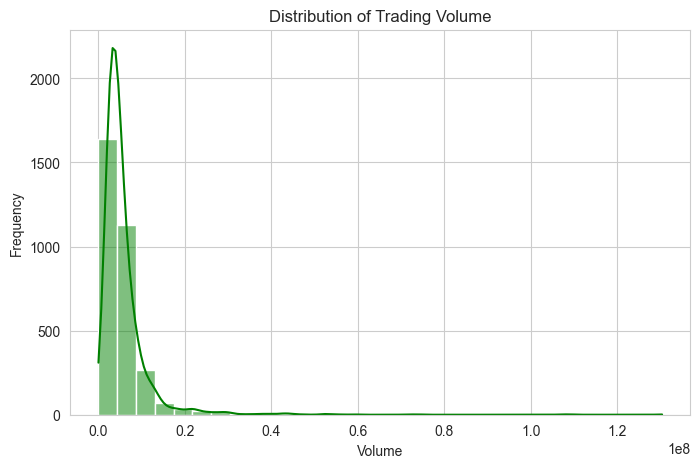

In [122]:
# Distribution of trading volume
plt.figure(figsize=(8, 5))
sns.histplot(df['Volume'], bins=30, kde=True, color='green')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()

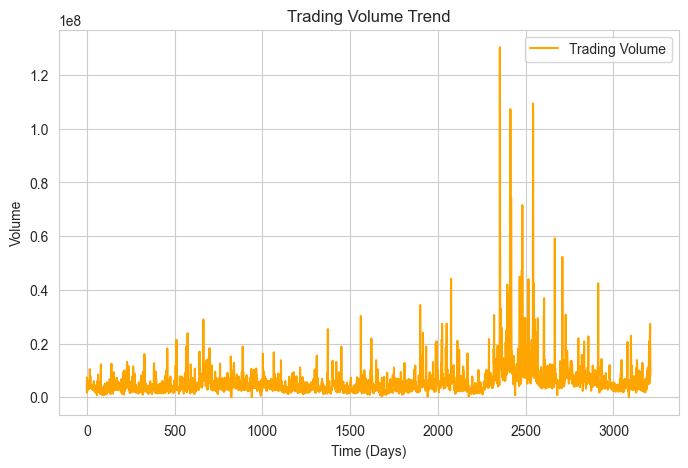

In [123]:
# Plot Trading Volume Trend
plt.figure(figsize=(8, 5))
plt.plot(df["Volume"], label="Trading Volume", color="orange")
plt.xlabel("Time (Days)")
plt.ylabel("Volume")
plt.title("Trading Volume Trend")
plt.legend()
plt.show()

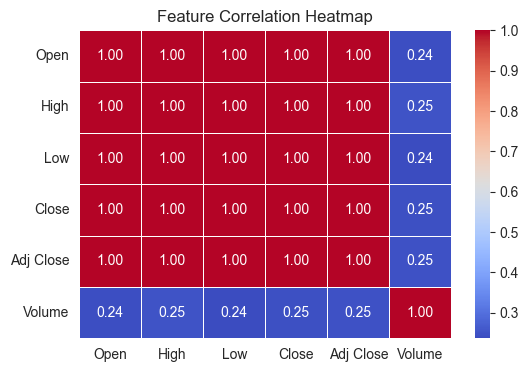

In [124]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Time Series Analysis

### Closing Price Trend Analysis

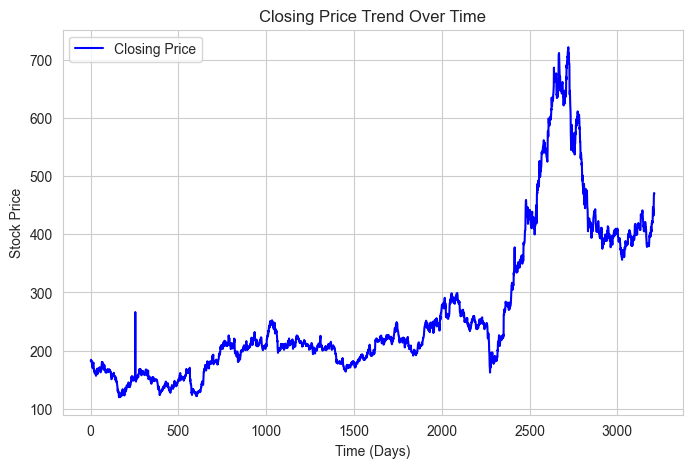

In [125]:
# Plot Closing Price Trend

# Closing Price Trend – Tracks stock movement over time.

plt.figure(figsize=(8, 5))
plt.plot(df["Close"], label="Closing Price", color="blue")
plt.xlabel("Time (Days)")
plt.ylabel("Stock Price")
plt.title("Closing Price Trend Over Time")
plt.legend()
plt.show()

### Moving Averages (SMA & EMA)

In [126]:
# Define Moving Average Windows
short_window = 20   # Short-term trend
long_window = 50    # Long-term trend

In [127]:
# Calculate Moving Averages
df["SMA_20"] = df["Close"].rolling(window=short_window).mean()
df["EMA_50"] = df["Close"].ewm(span=long_window, adjust=False).mean()

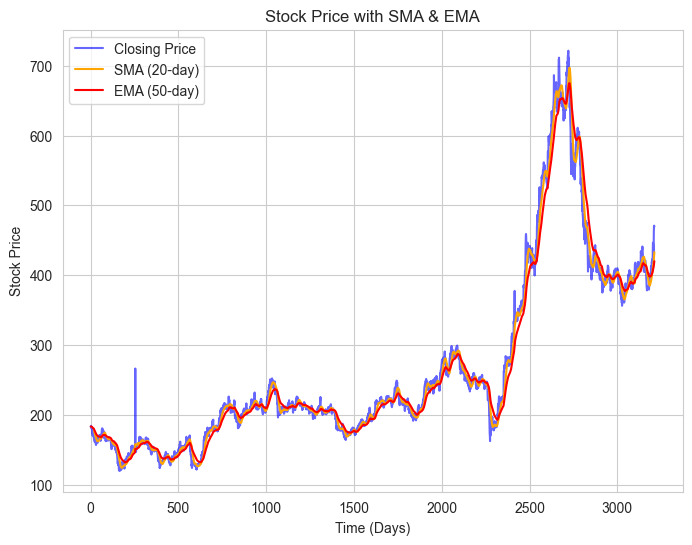

In [128]:
# Plot Closing Price with SMA & EMA
plt.figure(figsize=(8, 6))
plt.plot(df["Close"], label="Closing Price", color="blue", alpha=0.6)
plt.plot(df["SMA_20"], label="SMA (20-day)", color="orange")
plt.plot(df["EMA_50"], label="EMA (50-day)", color="red")
plt.xlabel("Time (Days)")
plt.ylabel("Stock Price")
plt.title("Stock Price with SMA & EMA")
plt.legend()
plt.show()

#Moving Averages (SMA & EMA) – Identifies short-term & long-term trends.

### Breakout Analysis (Support & Resistance Levels)

In [129]:
# Define Support & Resistance Levels
support_level = df["Close"].min()  # Lowest price
resistance_level = df["Close"].max()  # Highest price

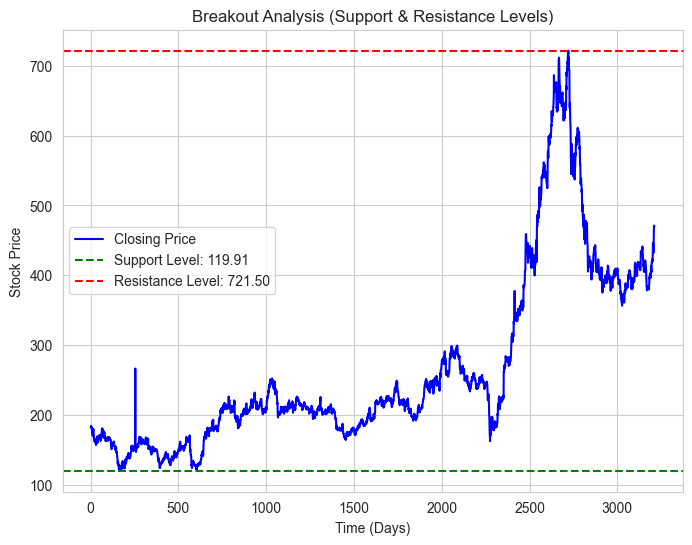

In [130]:
# Plot Breakout Analysis
plt.figure(figsize=(8, 6))
plt.plot(df["Close"], label="Closing Price", color="blue")
plt.axhline(support_level, color="green", linestyle="dashed", label=f"Support Level: {support_level:.2f}")
plt.axhline(resistance_level, color="red", linestyle="dashed", label=f"Resistance Level: {resistance_level:.2f}")
plt.xlabel("Time (Days)")
plt.ylabel("Stock Price")
plt.title("Breakout Analysis (Support & Resistance Levels)")
plt.legend()
plt.show()

#Breakout Analysis – Detects key support & resistance levels.

# Risk Analysis

### Daily Returns Analysis

In [131]:
# Calculate Daily Returns
df["Daily_Return"] = df["Close"].pct_change()

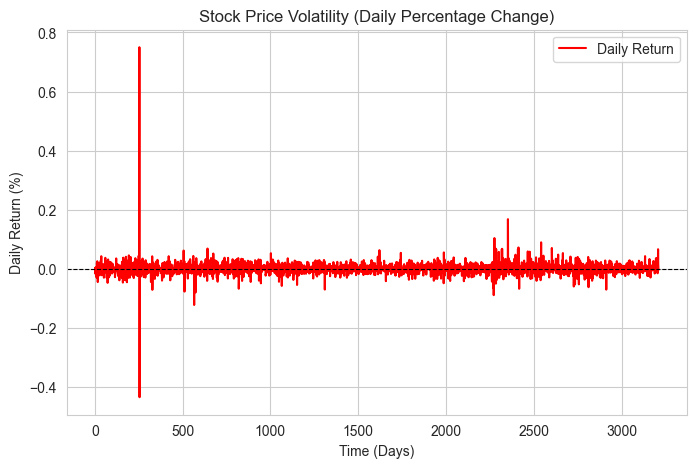

In [132]:
# Plot Daily Returns
plt.figure(figsize=(8, 5))
plt.plot(df["Daily_Return"], label="Daily Return", color="red")
plt.axhline(0, linestyle="--", color="black", linewidth=0.8)  # Horizontal line at 0
plt.xlabel("Time (Days)")
plt.ylabel("Daily Return (%)")
plt.title("Stock Price Volatility (Daily Percentage Change)")
plt.legend()
plt.show()

# Measure daily percentage changes in price.

### Sharpe Ratio Calculation

In [133]:
# Calculate Sharpe Ratio
risk_free_rate = 0.02 / 252  # Assume 2% annual risk-free rate converted to daily
mean_return = df["Daily_Return"].mean()
std_dev = df["Daily_Return"].std()

sharpe_ratio = (mean_return - risk_free_rate) / std_dev * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Assess risk-adjusted returns.

Sharpe Ratio: 0.32


### Maximum Drawdown (Worst Decline in Stock Value)

Maximum Drawdown: -54.24%


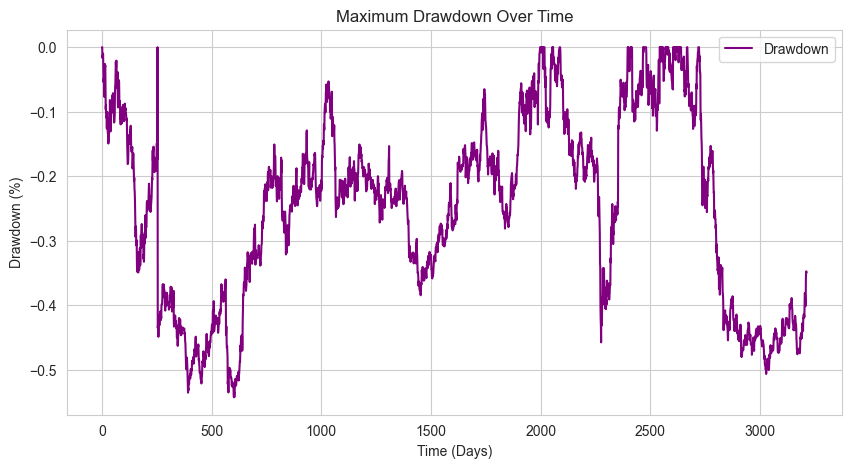

In [134]:
# Calculate Cumulative Returns
df["Cumulative_Return"] = (1 + df["Daily_Return"]).cumprod()

# Calculate Running Maximum
df["Cumulative_Max"] = df["Cumulative_Return"].cummax()

# Calculate Drawdown
df["Drawdown"] = df["Cumulative_Return"] / df["Cumulative_Max"] - 1

# Maximum Drawdown
max_drawdown = df["Drawdown"].min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

# Plot Drawdown Over Time
plt.figure(figsize=(10, 5))
plt.plot(df["Drawdown"], label="Drawdown", color="purple")
plt.xlabel("Time (Days)")
plt.ylabel("Drawdown (%)")
plt.title("Maximum Drawdown Over Time")
plt.legend()
plt.show()

#Identify the worst decline in stock value.